<a href="https://colab.research.google.com/github/WendyParra/Inteligencia-Artificial-Parra/blob/main/PerceptronIris_Clase_PARRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pereptrón
Implementación del algoritmo donde aprende dos clases (Setosa, Versicolor)

##Librerias
*    **Numpy** para operaciones con matrices y álgebra lineal
*    **Pandas** para manipulación de datos. (Para este casi se usa para recargar y procesar el conjunto de datos Iris)
*     **Matplotib** visualización de datos

Este constructor inicializa el perceptrón con tres parámetros:
*    **eta** tasa de aptrendizaje, que controla cuándo se ajustan los pesos en cada paso.
*    **n_inte**corresponde al número de interaciónes o épocas.
*    **random_state** garabnriza la reporducibilidad, inicializa los pesos de manera aleatoria.

**Método FIT:** Ajusta los datos de entrenamiento. La variable X es la matriz de características con Y son sus etiquetas correspondientes.

**self.w_**Se inicializan los pesos aleatroiamente. En el vector w_ se incluye un peso adicional para el sesgo en la posoción w_[0].

**update, self.w_[1:],  selg.w[0]** evalua si la predicción no coincide con un valor real, se ajusta los pesos de forma proporcional enntre la prediccion y el valor del objeto [xi] multiplicado por la taza de aprendizaje, los errores de almacen e la lista errors_ para cada epoca.

MÉTODOS AUXILIARES

net_input: Calcula la suma ponderada de las entradas y los pesos.
predict Devuelve la predicción de la clase (-1 o 1) aplicando la función de activación.

Calcula el ángulo en radianes entre dos vectores v1 y v2 usando el coseno del ángulo

df: carga el conjunto de datos iris que contiene 150 ejemplos de tres especies de iris (setosa,versicolor,virginica), para este ejemplo se toman 100 (50setosa y 50 versicolor)

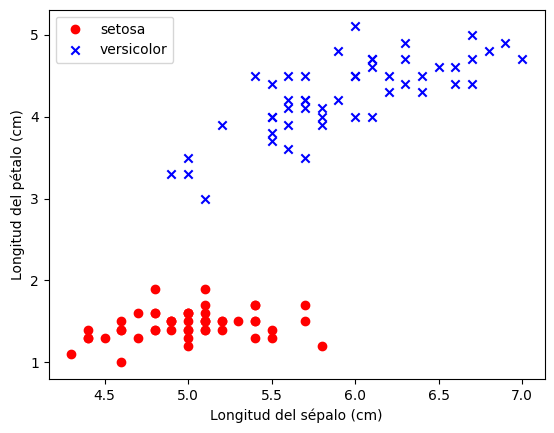

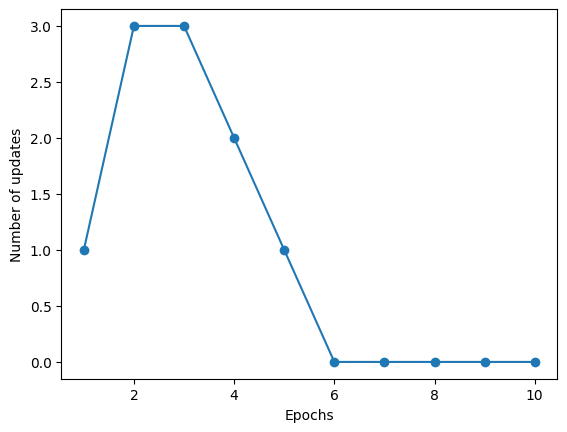

In [41]:
from IPython.display import Image  # para los gráficos
import numpy as np  # operaciones con matrices
import pandas as pd
import matplotlib.pyplot as plt

# Definir la clase Perceptron
class Perceptron(object):
    def __init__(self, eta=0.01, n_inter=50, random_state=1):#se define el constructor
        self.eta = eta  #Parametro 1
        self.n_inter = n_inter  #Parametro 2
        self.random_state = random_state  #Parametro 3

    # Método para ajustar el perceptrón al conjunto de datos
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Pesos iniciales
        self.errors_ = []

        for _ in range(self.n_inter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

v1 = np.array([1, 2, 3])
v2 = 0.5 * v1
np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()
#seleccionar setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
#extraer logitud de sépalo y longitud de pétalo
x = df.iloc[0:100, [0, 2]].values

plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('Longitud del sépalo (cm)')
plt.ylabel('Longitud del pétalo (cm)')
plt.legend(loc='upper left')
plt.show()

# Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_inter=10)  # n_inter corregido
ppn.fit(x, y)  # Ajustar el modelo con los datos x y y

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
